In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [111]:
path = 'emotional database/motion capture/'
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(os.path.join(r, file))

In [112]:
descriptors = pd.read_csv('Descriptors.csv', index_col=0)
descriptors.head()

,gender,gender_no,output,expression_index,video_name,start_time_in_sec,end_time_in_sec,start_exp,end_exp,text_file,kinect_start_frame,kinect_end_frame
1,F,3,An,1,927_0216_01.MP4,5.356700,9.481139,161,284,20170902_092359_00.txt,217,312
2,F,3,An,2,927_0216_01.MP4,9.883585,14.903150,296,447,20170902_092359_00.txt,322,466
3,F,3,An,3,927_0216_01.MP4,14.903150,19.427206,447,582,20170902_092359_00.txt,466,564
4,F,3,An,4,927_0216_01.MP4,19.427206,25.077029,582,752,20170902_092359_00.txt,564,699
5,F,3,An,5,927_0216_01.MP4,25.077029,29.981168,752,899,20170902_092359_00.txt,699,828


In [124]:
df = pd.DataFrame()
for file in files:
    temp_df = pd.read_csv(file, sep=';')
    textfile = file[34:]
    
    output_value = descriptors.loc[descriptors['text_file']==textfile]['output'][:1].values[0]
    video_name = descriptors.loc[descriptors['text_file']==textfile]['video_name'][:1].values[0]
    gender = descriptors.loc[descriptors['text_file']==textfile]['gender'][:1].values[0]
    if textfile == '20170902_115419_00.txt':
        print(textfile, output_value, video_name, gender)
    #print(len(temp_df), textfile)
    temp_df['textfile'] = textfile
    temp_df['output'] = output_value
    temp_df['video_name'] = video_name
    temp_df['gender'] = gender
    df = df.append(temp_df, sort=False)

20170902_115419_00.txt Ha 927_0282_01.MP4 F


In [125]:
df.head()

,frameTime,bodyIndex,SpineBase_positionX,SpineBase_positionY,SpineBase_positionZ,SpineBase_rotationX,SpineBase_rotationY,SpineBase_rotationZ,SpineMid_positionX,SpineMid_positionY,...,ThumbRight_positionY,ThumbRight_positionZ,ThumbRight_rotationX,ThumbRight_rotationY,ThumbRight_rotationZ,Unnamed: 152,textfile,output,video_name,gender
0,1234,0,0.062298,0.230842,2.540962,358.7676,180.1466,2.819737,0.077674,0.542595,...,1.357066,2.628572,0,0,0,NaN,20170902_085505_00.txt,Ne,927_0196_01.MP4,M
1,1266,0,0.069238,0.257058,2.526453,356.7902,179.9677,1.979240,0.079333,0.548986,...,1.338728,2.621750,0,0,0,NaN,20170902_085505_00.txt,Ne,927_0196_01.MP4,M
2,1334,0,0.084557,0.248516,2.483606,351.4843,183.0456,359.412200,0.083828,0.551884,...,1.339403,2.615883,0,0,0,NaN,20170902_085505_00.txt,Ne,927_0196_01.MP4,M
3,1366,0,0.084818,0.249397,2.483649,352.0697,182.5708,359.807800,0.085690,0.553738,...,1.418415,2.645500,0,0,0,NaN,20170902_085505_00.txt,Ne,927_0196_01.MP4,M
4,1399,0,0.085442,0.250219,2.483902,352.3281,182.3243,0.070354,0.087480,0.554349,...,1.373415,2.632500,0,0,0,NaN,20170902_085505_00.txt,Ne,927_0196_01.MP4,M


In [126]:
df.drop(columns=['Unnamed: 152'], inplace=True)

In [130]:
df.to_csv('Motion_capture.csv')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68101 entries, 0 to 1031
Columns: 156 entries, frameTime to gender
dtypes: float64(129), int64(23), object(4)
memory usage: 81.6+ MB


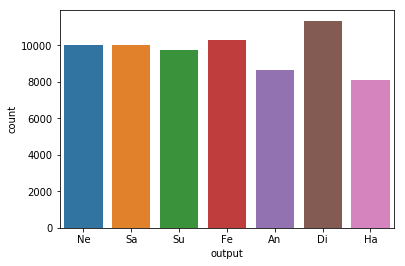

In [132]:
sns.countplot(x="output", data=df)

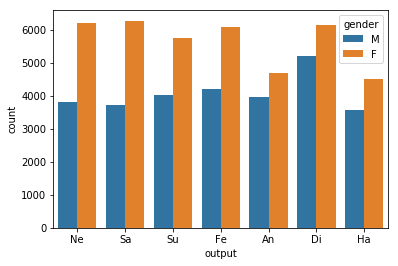

In [135]:
sns.countplot(x="output", hue="gender", data=df)

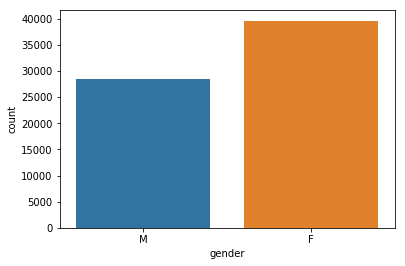

In [136]:
sns.countplot(x="gender", data=df)